In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
country = pd.read_csv('/content/cleaned_global_country_development.csv')

In [ ]:
country.head()

,country,average_score,safety_and_security,personal_freedom,governance,social_capital,economic_quality,living_conditions,health,education,natural_environment
0,Denmark,84.55,92.59,94.09,89.45,82.56,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,79.71,94.66,82.11,87.72,73.60


In [ ]:
uni = pd.read_csv('/content/cleaned_world_university_rank.csv')

In [ ]:
uni.head()

,university_rank,university_name,country,total_students,students_per_staff,international_students_percentage,gender_ratio
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60


In [ ]:
import seaborn as sns

In [ ]:
# focused analysis for top 10 for avg score
top_countries = country.sort_values(by='average_score', ascending=False).head(10)

In [ ]:
# inspect unique country names in each dataset
print("Unique countries in country_data:")
print(country['country'].unique())

print("\nUnique countries in uni_data:")
print(uni['country'].unique())


Unique countries in country_data:
['\xa0Denmark' '\xa0Sweden' '\xa0Norway' '\xa0Finland'
 '\xa0\xa0Switzerland' '\xa0Netherlands' '\xa0Luxembourg' '\xa0Iceland'
 '\xa0Germany' '\xa0New Zealand' '\xa0Ireland' '\xa0United Kingdom'
 '\xa0Canada' '\xa0Austria' '\xa0Australia' '\xa0Japan' '\xa0Singapore'
 '\xa0Belgium' '\xa0United States' '\xa0Taiwan' '\xa0Estonia'
 '\xa0Hong Kong' '\xa0France' '\xa0Spain' '\xa0Czech Republic'
 '\xa0Portugal' '\xa0Slovenia' '\xa0Malta' '\xa0South Korea' '\xa0Italy'
 '\xa0Latvia' '\xa0Lithuania' '\xa0Israel' '\xa0Cyprus' '\xa0Slovakia'
 '\xa0Chile' '\xa0Poland' '\xa0Uruguay' '\xa0Costa Rica' '\xa0Greece'
 '\xa0Croatia' '\xa0Hungary' '\xa0Malaysia' '\xa0United Arab Emirates'
 '\xa0Romania' '\xa0Qatar' '\xa0Mauritius' '\xa0Bulgaria' '\xa0Montenegro'
 '\xa0Panama' '\xa0Seychelles' '\xa0Serbia' '\xa0Georgia' '\xa0China'
 '\xa0Macedonia' '\xa0Trinidad and Tobago' '\xa0Jamaica' '\xa0Argentina'
 '\xa0Peru' '\xa0Kuwait' '\xa0Armenia' '\xa0Bahrain' '\xa0Indonesia'
 '

In [ ]:
country.columns.tolist()

['country',
 'average_score',
 'safety_and_security',
 'personal_freedom',
 'governance',
 'social_capital',
 'economic_quality',
 'living_conditions',
 'health',
 'education',
 'natural_environment']

In [ ]:
uni.columns.tolist()

['university_rank',
 'university_name',
 'country',
 'total_students',
 'students_per_staff',
 'international_students_percentage',
 'gender_ratio']

In [ ]:
# aggregating the university ranking dataset to count universities per country
university_counts = uni.groupby('country').size().reset_index(name='university_count')

# cleaning
university_counts['country'] = university_counts['country'].str.strip()
country['country'] = country['country'].str.strip()

# merging the datasets using the 'country' column
merged_data = pd.merge(university_counts, country, on='country', how='inner')

merged_data.to_csv("merged_dataset.csv", index=False)

<ipython-input-69-f0bf7f829818>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='university_count', data=top_10_countries, palette='viridis')


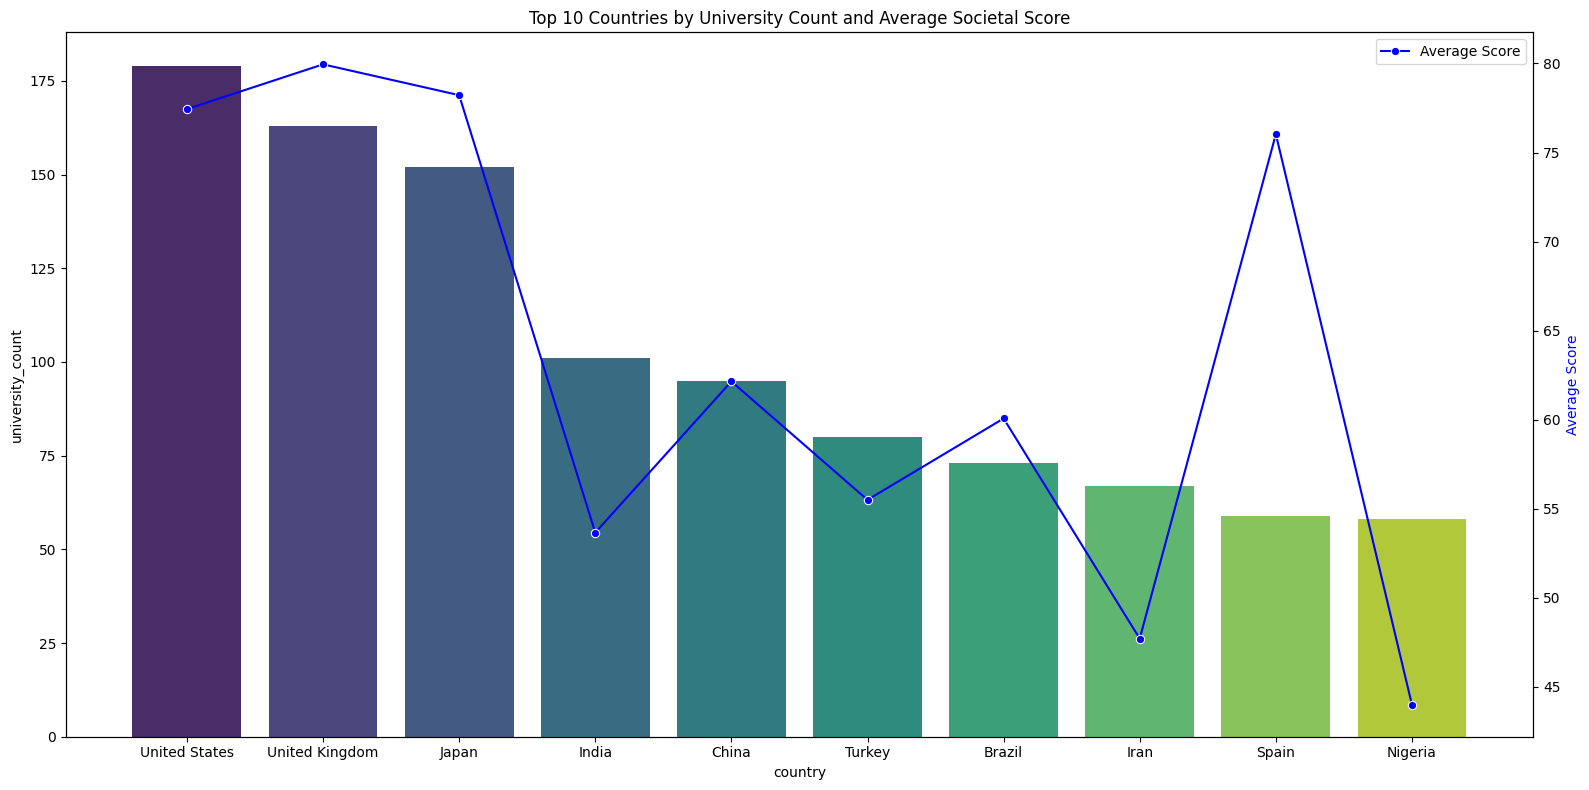

In [ ]:
# S\sort the data by university count and select the top 10 countries
top_10_countries = merged_data.nlargest(10, 'university_count')

plt.figure(figsize=(16, 8))

sns.barplot(x='country', y='university_count', data=top_10_countries, palette='viridis')

ax2 = plt.gca().twinx()
sns.lineplot(x='country', y='average_score', data=top_10_countries, color='blue', marker='o', ax=ax2, label='Average Score')

plt.title('Top 10 Countries by University Count and Average Societal Score')
plt.xlabel('Country')
plt.ylabel('University Count')
ax2.set_ylabel('Average Score', color='blue')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

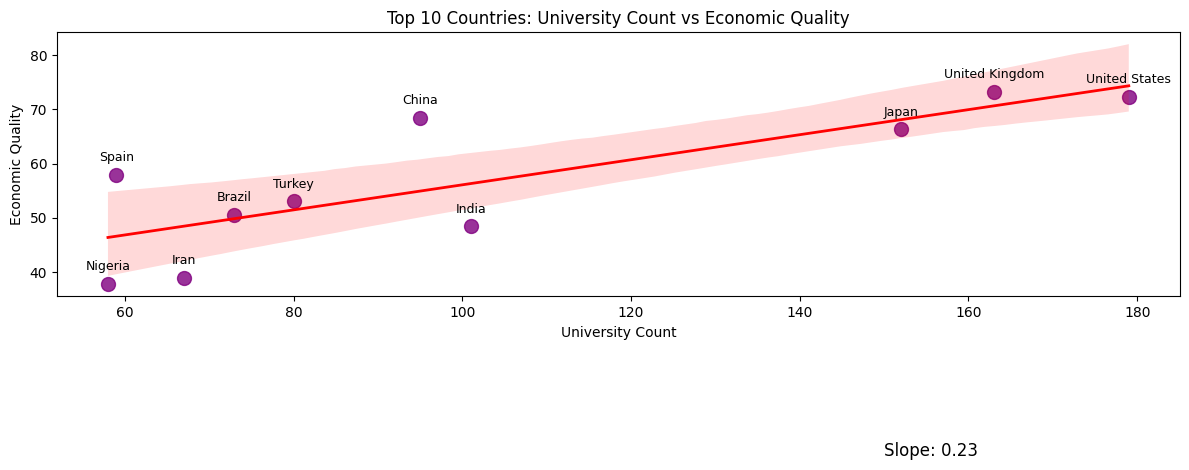

In [83]:
import scipy.stats as stats

# filter the top 10 countries by university count
top_10_countries = merged_data.nlargest(10, 'university_count')

# calculate linear regression for University Count vs Economic Score
slope_economic, intercept_economic, r_value_economic, p_value_economic, std_err_economic = stats.linregress(top_10_countries['university_count'], top_10_countries['economic_quality'])

# plot for University Count vs Economic Score with country labels
plt.figure(figsize=(12, 6))
sns.regplot(x='university_count', y='economic_quality', data=top_10_countries,
            scatter_kws={'color': 'purple', 's': 100}, line_kws={'color': 'red', 'linewidth': 2})
for i, row in top_10_countries.iterrows():
    plt.annotate(row['country'],
                 (row['university_count'], row['economic_quality']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
plt.text(150, 6, f"Slope: {slope_economic:.2f}", fontsize=12, color='black')
plt.title('Top 10 Countries: University Count vs Economic Quality')
plt.xlabel('University Count')
plt.ylabel('Economic Quality')
plt.tight_layout()
plt.show()

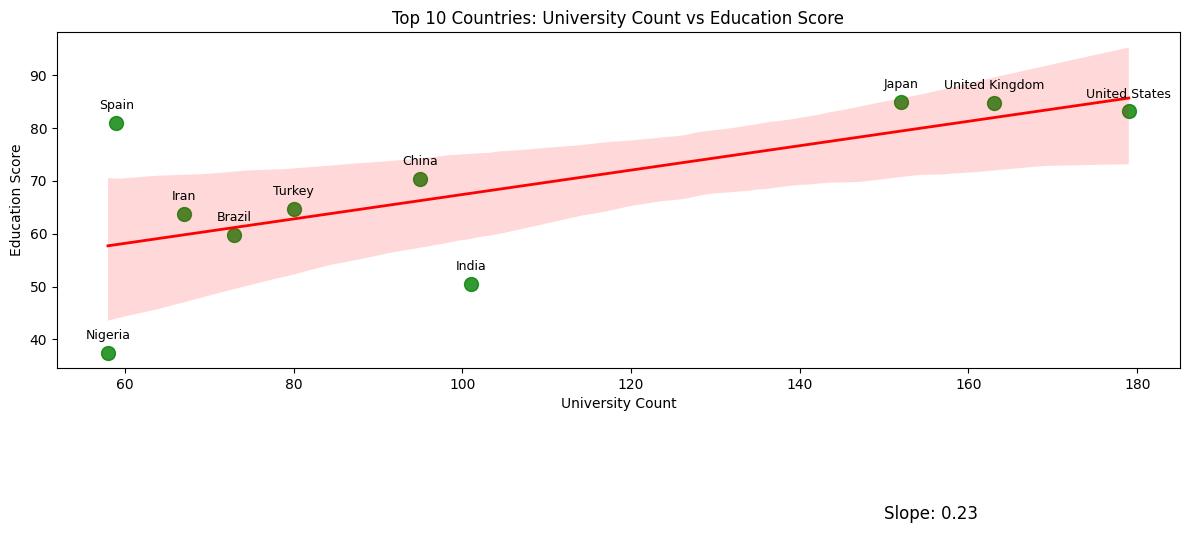

In [85]:

slope_education, intercept_education, r_value_education, p_value_education, std_err_education = stats.linregress(top_10_countries['university_count'], top_10_countries['education'])

# Plot for University Count vs Education Score with country labels
plt.figure(figsize=(12, 6))
sns.regplot(x='university_count', y='education', data=top_10_countries,
            scatter_kws={'color': 'green', 's': 100}, line_kws={'color': 'red', 'linewidth': 2})
for i, row in top_10_countries.iterrows():
    plt.annotate(row['country'],
                 (row['university_count'], row['education']),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
plt.text(150, 6, f"Slope: {slope_education:.2f}", fontsize=12, color='black')
plt.title('Top 10 Countries: University Count vs Education Score')
plt.xlabel('University Count')
plt.ylabel('Education Score')
plt.tight_layout()
plt.show()

In [86]:
# merging the international students percentage column into the merged dataset based on the 'country' column
merged_data_with_international_students = pd.merge(merged_data, uni[['country', 'international_students_percentage']], on='country', how='left')

merged_data_with_international_students.head()
merged_data_with_international_students.to_csv('merged_data_with_international_students.csv', index=False)

<ipython-input-91-fac461f8b8ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='university_name', y='international_students_percentage', data=top_10_universities_international_students, palette='viridis')


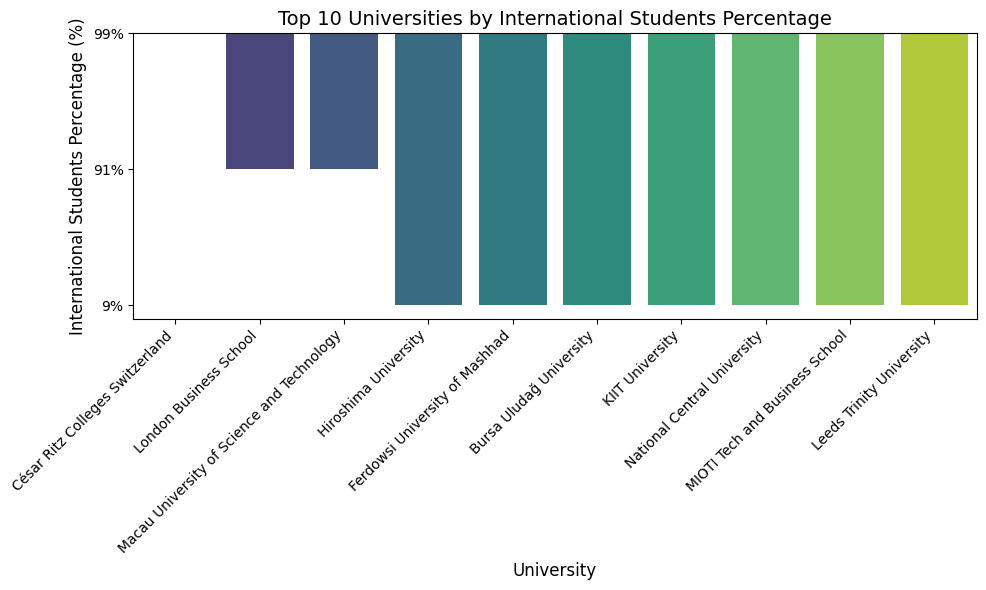

In [91]:
#top 10 countries by international students percentage
top_10_universities_international_students = uni.sort_values('international_students_percentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Adjusted size for better readability
ax = sns.barplot(x='university_name', y='international_students_percentage', data=top_10_universities_international_students, palette='viridis')
plt.title('Top 10 Universities by International Students Percentage', fontsize=14)
plt.xlabel('University', fontsize=12)
plt.ylabel('International Students Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)


plt.tight_layout()
plt.show()

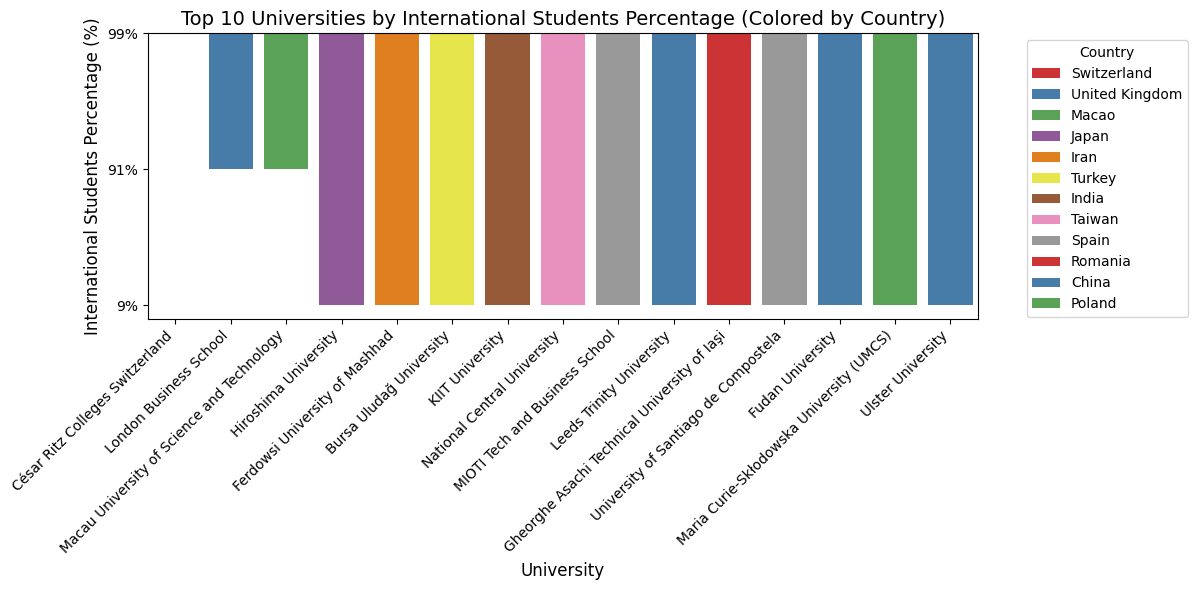

In [89]:

#top 10 uni by international students percentage
# sort the university dataset by 'international_students_percentage' in descending order and select the top 10
top_10_universities_international_students = uni.sort_values('international_students_percentage', ascending=False).head(15)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='university_name', y='international_students_percentage', data=top_10_universities_international_students,
                 palette='Set1', hue='country')
plt.title('Top 10 Universities by International Students Percentage (Colored by Country)', fontsize=14)
plt.xlabel('University', fontsize=12)
plt.ylabel('International Students Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.tight_layout()

# move legend outside the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

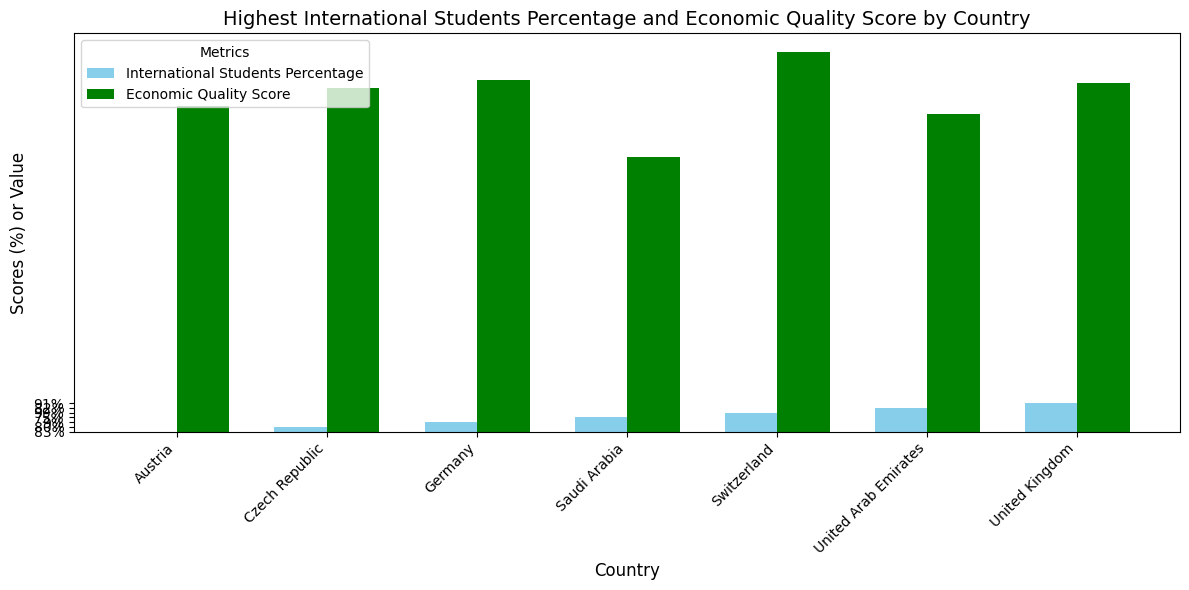

In [ ]:
#took countries from schools with top number of international students
target_countries = [
    'Germany', 'Switzerland', 'Macao', 'United Kingdom', 'Northern Cyprus',
    'Austria', 'United Arab Emirates', 'Czech Republic', 'Saudi Arabia'
]

# filter merged dataset for the target countries
filtered_data = merged_data_with_international_students[merged_data_with_international_students['country'].isin(target_countries)]


top_countries = filtered_data.groupby('country').agg(
    highest_international_percentage=('international_students_percentage', 'max'),
    corresponding_economic_quality=('economic_quality', 'max')
).reset_index()


fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(top_countries))

# plotting the international students percentage
ax.bar(indices - bar_width / 2, top_countries['highest_international_percentage'],
       width=bar_width, color='skyblue', label='International Students Percentage')

# plotting the economic quality score
ax.bar(indices + bar_width / 2, top_countries['corresponding_economic_quality'],
       width=bar_width, color='green', label='Economic Quality Score')

plt.title('Highest International Students Percentage and Economic Quality Score by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Scores (%) or Value', fontsize=12)


plt.xticks(indices, top_countries['country'], rotation=45, ha="right", fontsize=10)
plt.legend(title='Metrics', loc='upper left')
plt.tight_layout()
plt.show()